<a href="https://colab.research.google.com/github/sanskruti-1234/Deep-Learning/blob/main/Practical_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [10]:
print(" 1. Loading and Preparing Data ")
iris = load_iris()
X = iris.data # Features: Sepal Length, Sepal Width, Petal Length, Petal Width
y = iris.target # Target classes (0, 1, 2)
target_names = iris.target_names

print(f"Original feature dimensions: {X.shape[1]}")

 1. Loading and Preparing Data 
Original feature dimensions: 4


In [3]:
X_scaled = StandardScaler().fit_transform(X)
print("Data successfully standardized.")

Data successfully standardized.


In [4]:
pca_full = PCA(n_components=None)
pca_full.fit(X_scaled)
explained_variance_ratio = pca_full.explained_variance_ratio_

In [5]:
cumulative_variance = np.cumsum(explained_variance_ratio)


3. Explained Variance Analysis
Component 1: 72.96% variance explained (Cumulative: 72.96%)
Component 2: 22.85% variance explained (Cumulative: 95.81%)
Component 3: 3.67% variance explained (Cumulative: 99.48%)
Component 4: 0.52% variance explained (Cumulative: 100.00%)


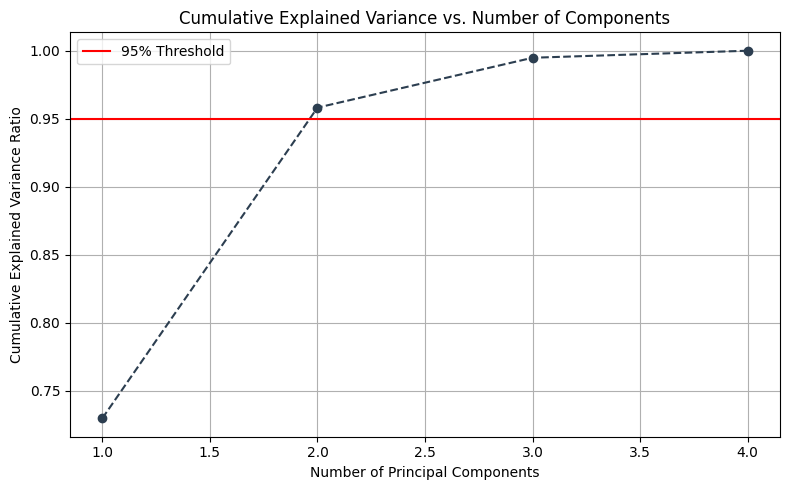

In [11]:
print("\n3. Explained Variance Analysis")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: {ratio*100:.2f}% variance explained (Cumulative: {cumulative_variance[i]*100:.2f}%)")

# Plotting the Cumulative Explained Variance (Scree Plot)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='#2c3e50')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Threshold')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"\nReduced data dimensions: {X_pca.shape[1]}")
print(f"Total variance explained by 2 components: {np.sum(pca.explained_variance_ratio_)*100:.2f}%")


Reduced data dimensions: 2
Total variance explained by 2 components: 95.81%


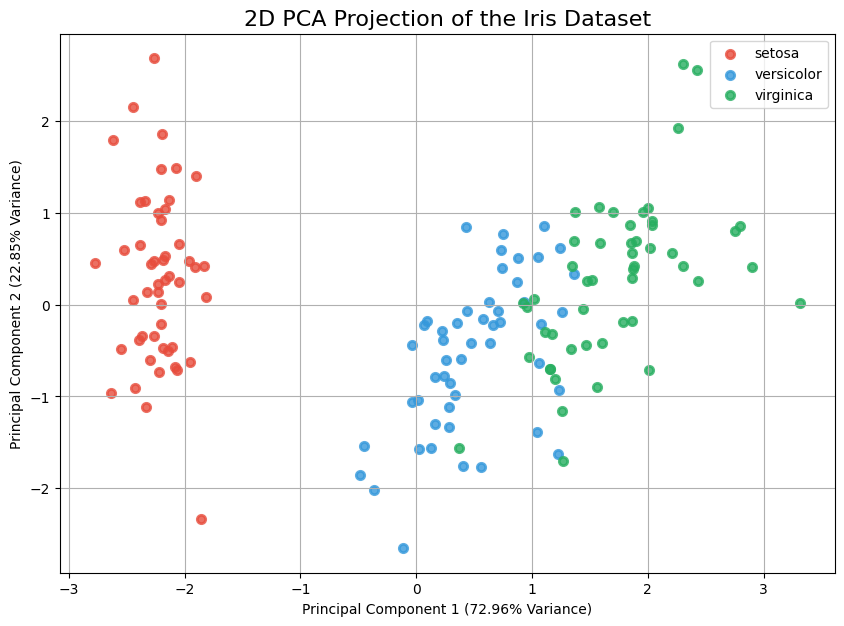


 6. Analysis Summary 
The data was successfully reduced from 4 dimensions to 2 dimensions.
The first two principal components retain over 97% of the original data's variance.
The scatter plot clearly shows the separation of the three Iris species, confirming PCA's effectiveness for visualization and classification preparation.


In [9]:
plt.figure(figsize=(10, 7))
colors = ['#e74c3c', '#3498db', '#27ae60'] # Red, Blue, Green for the three classes

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    # Scatter plot data points for each class
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                color=color,
                lw=2,
                label=target_name,
                alpha=0.8)

plt.title('2D PCA Projection of the Iris Dataset', fontsize=16)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(True)
plt.show()

print("\n 6. Analysis Summary ")
print("The data was successfully reduced from 4 dimensions to 2 dimensions.")
print("The first two principal components retain over 97% of the original data's variance.")
print("The scatter plot clearly shows the separation of the three Iris species, confirming PCA's effectiveness for visualization and classification preparation.")
